In [42]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
import numpy as np
from highlight_text import fig_text
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
import math

In [2]:
# Scrape a league matches
base_url = 'https://understat.com/league/'
# Type the league name
league = 'Serie_A' 
url = base_url+league

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [4]:
#get only the datesData
strings = scripts[1].string
strings[0:1000]

"\n\tvar datesData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2222305\\x22,\\x22isResult\\x22\\x3Atrue,\\x22h\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x22108\\x22,\\x22title\\x22\\x3A\\x22Empoli\\x22,\\x22short_title\\x22\\x3A\\x22EMP\\x22\\x7D,\\x22a\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2294\\x22,\\x22title\\x22\\x3A\\x22Verona\\x22,\\x22short_title\\x22\\x3A\\x22VER\\x22\\x7D,\\x22goals\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x220\\x22,\\x22a\\x22\\x3A\\x221\\x22\\x7D,\\x22xG\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x220.844727\\x22,\\x22a\\x22\\x3A\\x220.690842\\x22\\x7D,\\x22datetime\\x22\\x3A\\x222023\\x2D08\\x2D19\\x2016\\x3A30\\x3A00\\x22,\\x22forecast\\x22\\x3A\\x7B\\x22w\\x22\\x3A\\x220.3687\\x22,\\x22d\\x22\\x3A\\x220.3625\\x22,\\x22l\\x22\\x3A\\x220.2688\\x22\\x7D\\x7D,\\x7B\\x22id\\x22\\x3A\\x2222306\\x22,\\x22isResult\\x22\\x3Atrue,\\x22h\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x22112\\x22,\\x22title\\x22\\x3A\\x22Frosinone\\x22,\\x22short_title\\x22\\x3A\\x22FRO\\x22\\x7D,\\x22a\\x22\\x3A\\x7B\\x22id\\x

In [5]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)
data[0]

{'id': '22305',
 'isResult': True,
 'h': {'id': '108', 'title': 'Empoli', 'short_title': 'EMP'},
 'a': {'id': '94', 'title': 'Verona', 'short_title': 'VER'},
 'goals': {'h': '0', 'a': '1'},
 'xG': {'h': '0.844727', 'a': '0.690842'},
 'datetime': '2023-08-19 16:30:00',
 'forecast': {'w': '0.3687', 'd': '0.3625', 'l': '0.2688'}}

In [6]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

data = json_normalize(data, sep = "_")
data.tail()

,id,isResult,datetime,h_id,h_title,h_short_title,a_id,a_title,a_short_title,goals_h,goals_a,xG_h,xG_a,forecast_w,forecast_d,forecast_l
375,22680,False,2024-05-26 18:00:00,98,Juventus,JUV,271,Monza,MON,None,None,None,None,NaN,NaN,NaN
376,22681,False,2024-05-26 18:00:00,96,Lazio,LAZ,104,Sassuolo,SAS,None,None,None,None,NaN,NaN,NaN
377,22682,False,2024-05-26 18:00:00,111,AC Milan,MIL,264,Salernitana,SAL,None,None,None,None,NaN,NaN,NaN
378,22683,False,2024-05-26 18:00:00,101,Genoa,GEN,97,Bologna,BOL,None,None,None,None,NaN,NaN,NaN
379,22684,False,2024-05-26 18:00:00,105,Napoli,NAP,243,Lecce,LEC,None,None,None,None,NaN,NaN,NaN


In [7]:
data.dtypes

id               object
isResult           bool
datetime         object
h_id             object
h_title          object
h_short_title    object
a_id             object
a_title          object
a_short_title    object
goals_h          object
goals_a          object
xG_h             object
xG_a             object
forecast_w       object
forecast_d       object
forecast_l       object
dtype: object

In [8]:
data.fillna(0, inplace=True)

In [9]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.normalize()
data[['id', 'h_id', 'a_id', 'goals_h', 'goals_a']] = \
        data[['id', 'h_id', 'a_id', 'goals_h', 'goals_a']].astype(int)

data[['xG_h', 'xG_a', 'forecast_w', 'forecast_d', 'forecast_l']] = data[['xG_h', 'xG_a', 'forecast_w', 'forecast_d', 'forecast_l']].astype(float)

In [10]:
data.dtypes

id                        int32
isResult                   bool
datetime         datetime64[ns]
h_id                      int32
h_title                  object
h_short_title            object
a_id                      int32
a_title                  object
a_short_title            object
goals_h                   int32
goals_a                   int32
xG_h                    float64
xG_a                    float64
forecast_w              float64
forecast_d              float64
forecast_l              float64
date             datetime64[ns]
dtype: object

In [11]:
data.tail()

,id,isResult,datetime,h_id,h_title,h_short_title,a_id,a_title,a_short_title,goals_h,goals_a,xG_h,xG_a,forecast_w,forecast_d,forecast_l,date
375,22680,False,2024-05-26 18:00:00,98,Juventus,JUV,271,Monza,MON,0,0,0.0,0.0,0.0,0.0,0.0,2024-05-26
376,22681,False,2024-05-26 18:00:00,96,Lazio,LAZ,104,Sassuolo,SAS,0,0,0.0,0.0,0.0,0.0,0.0,2024-05-26
377,22682,False,2024-05-26 18:00:00,111,AC Milan,MIL,264,Salernitana,SAL,0,0,0.0,0.0,0.0,0.0,0.0,2024-05-26
378,22683,False,2024-05-26 18:00:00,101,Genoa,GEN,97,Bologna,BOL,0,0,0.0,0.0,0.0,0.0,0.0,2024-05-26
379,22684,False,2024-05-26 18:00:00,105,Napoli,NAP,243,Lecce,LEC,0,0,0.0,0.0,0.0,0.0,0.0,2024-05-26


In [12]:
matches_yesterday = data[data['date'] == str(date.today() - timedelta(days=1))]
len(matches_yesterday)

5

In [13]:
matches_yesterday[matches_yesterday['isResult'] == True]

,id,isResult,datetime,h_id,h_title,h_short_title,a_id,a_title,a_short_title,goals_h,goals_a,xG_h,xG_a,forecast_w,forecast_d,forecast_l,date
123,22430,True,2023-11-26 11:30:00,116,Cagliari,CAG,271,Monza,MON,1,1,1.586630,0.802396,0.5779,0.2553,0.1668,2023-11-26
124,22428,True,2023-11-26 14:00:00,112,Frosinone,FRO,101,Genoa,GEN,2,1,0.990501,1.825520,0.1423,0.2486,0.6091,2023-11-26
125,22429,True,2023-11-26 14:00:00,108,Empoli,EMP,104,Sassuolo,SAS,3,4,1.477160,2.976030,0.0905,0.1690,0.7405,2023-11-26
126,22434,True,2023-11-26 17:00:00,95,Roma,ROM,99,Udinese,UDI,3,1,1.259420,0.532293,0.5557,0.3081,0.1362,2023-11-26
127,22432,True,2023-11-26 19:45:00,98,Juventus,JUV,106,Inter,INT,1,1,0.488914,0.692636,0.2258,0.4180,0.3562,2023-11-26


In [14]:
len(matches_yesterday[matches_yesterday['isResult'] == True])

5

C:\Users\4krav\AppData\Local\Temp\ipykernel_13248\1158497407.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_min_xg_h = pd.DataFrame({'minute': float(last_min_value), 'player': 'NaN', 'h_team': str(df_home['h_team'].iloc[-1]),
C:\Users\4krav\AppData\Local\Temp\ipykernel_13248\1158497407.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_min_xg_h = pd.DataFrame({'minute': float(last_min_value), 'player': 'NaN', 'h_team': str(df_home['h_team'].iloc[-1]),
C:\Users\4krav\AppData\Local\Temp\ipykernel_13248\1158497407.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fu

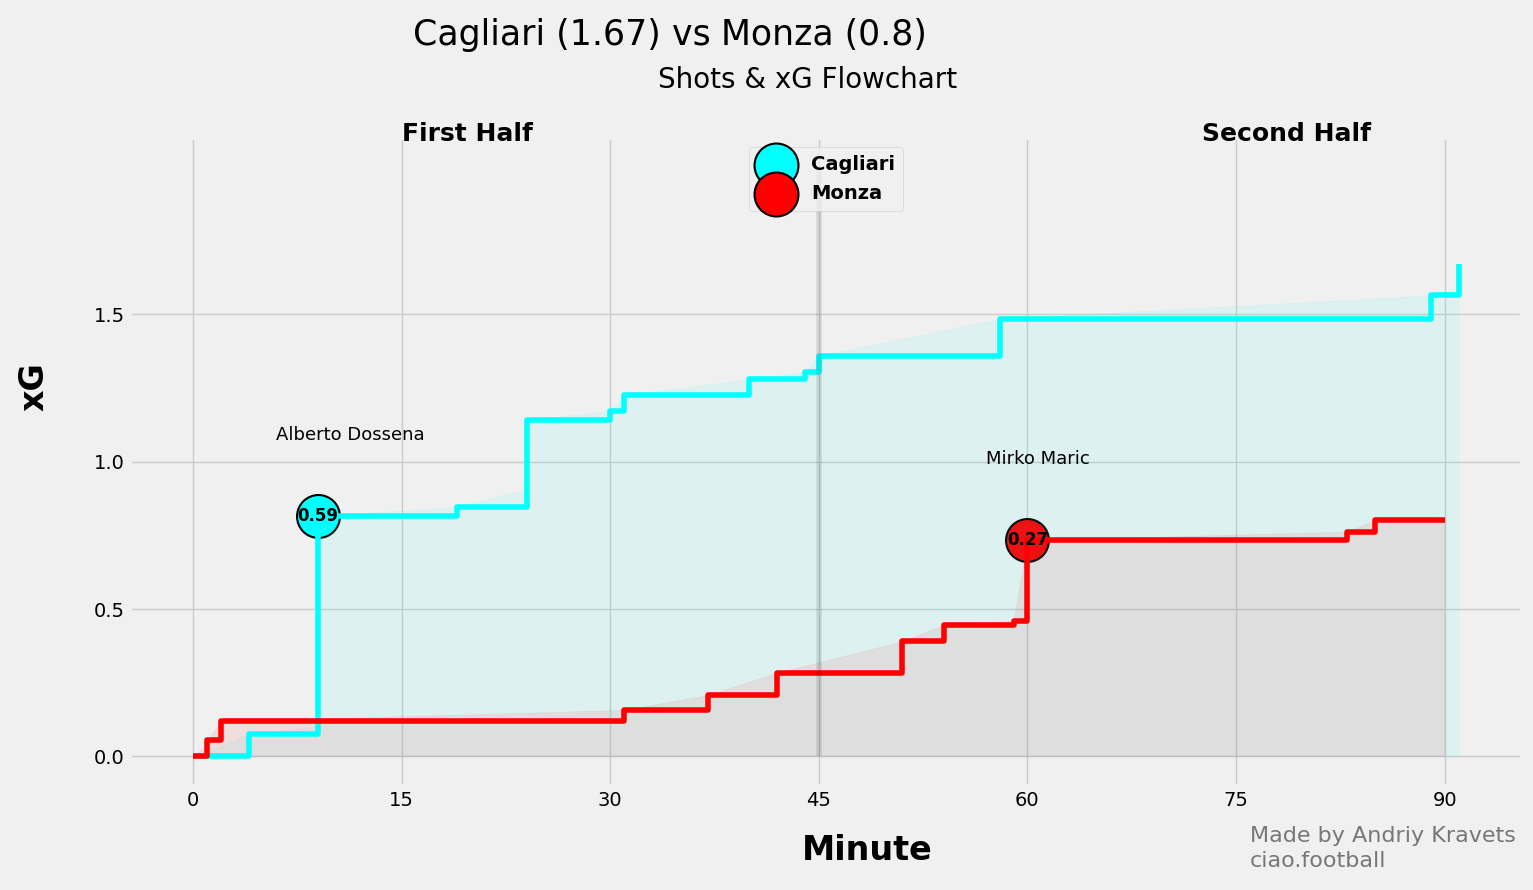

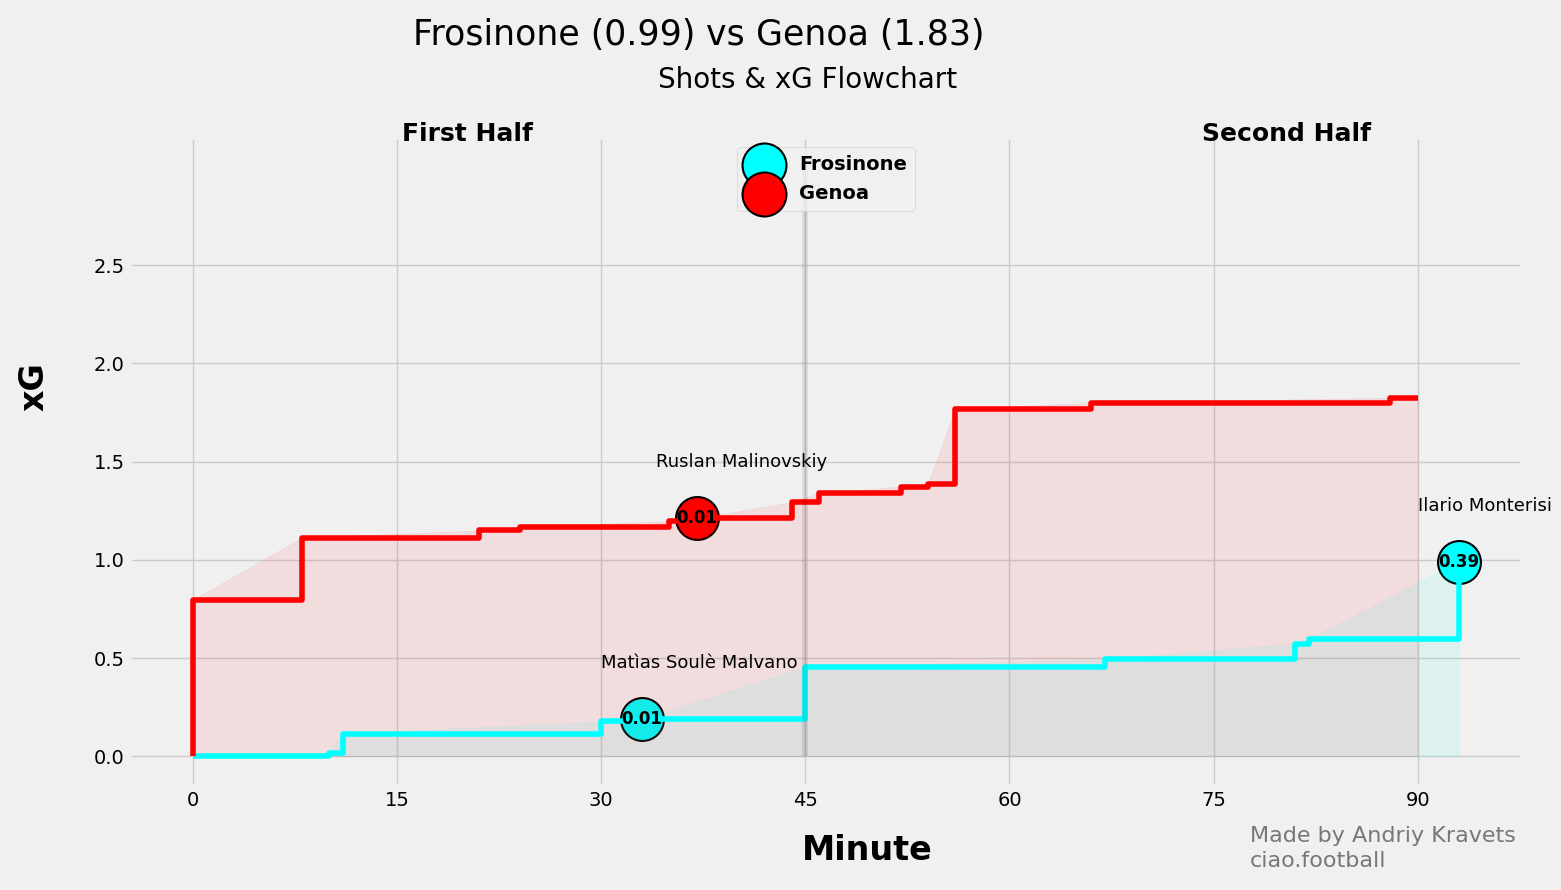

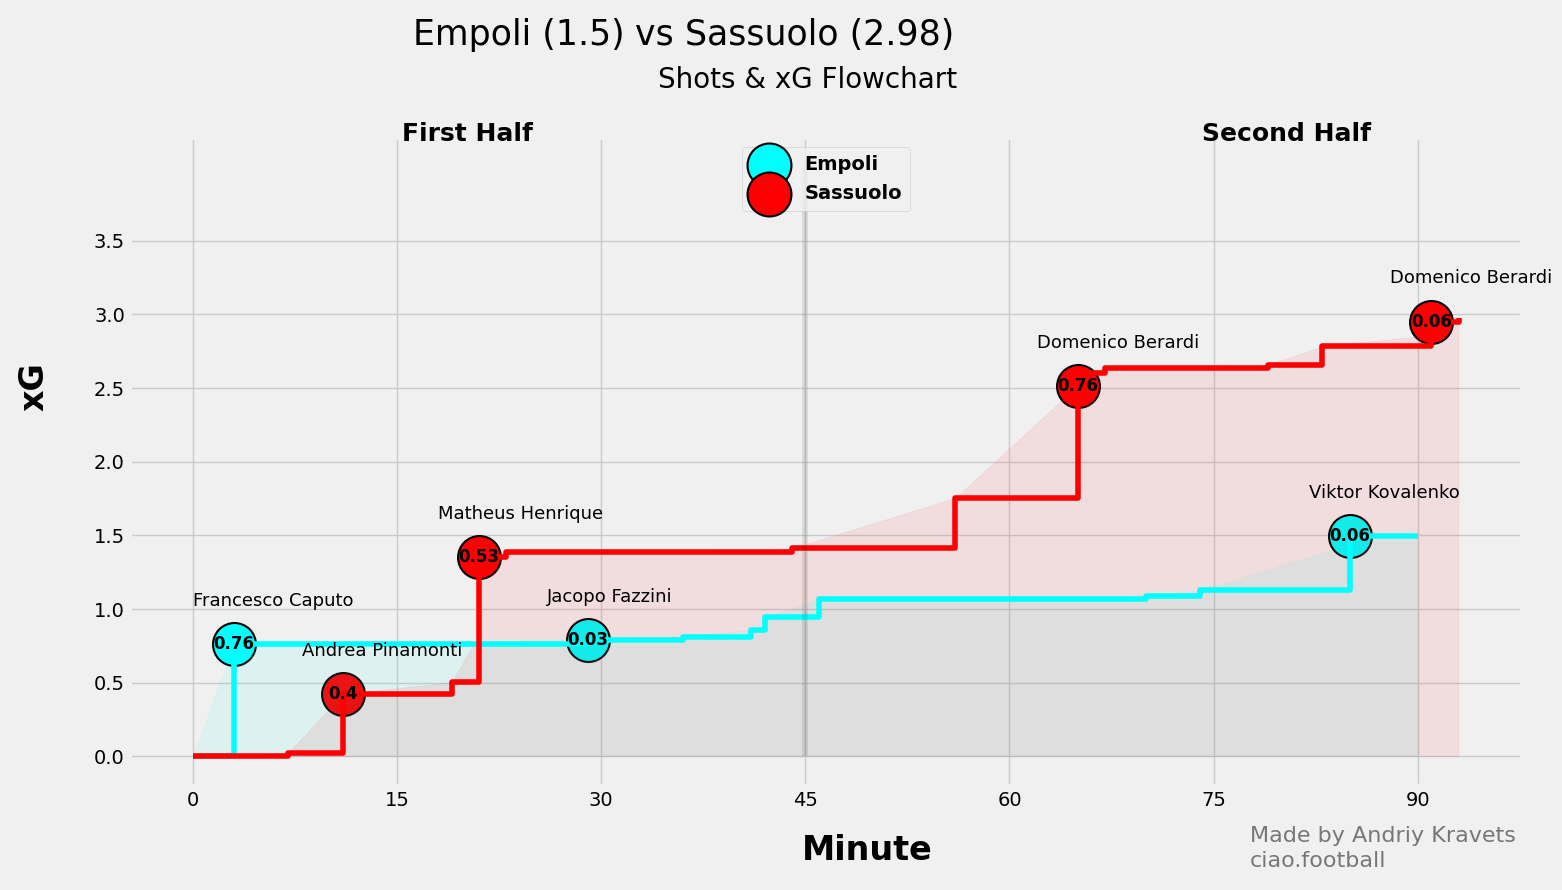

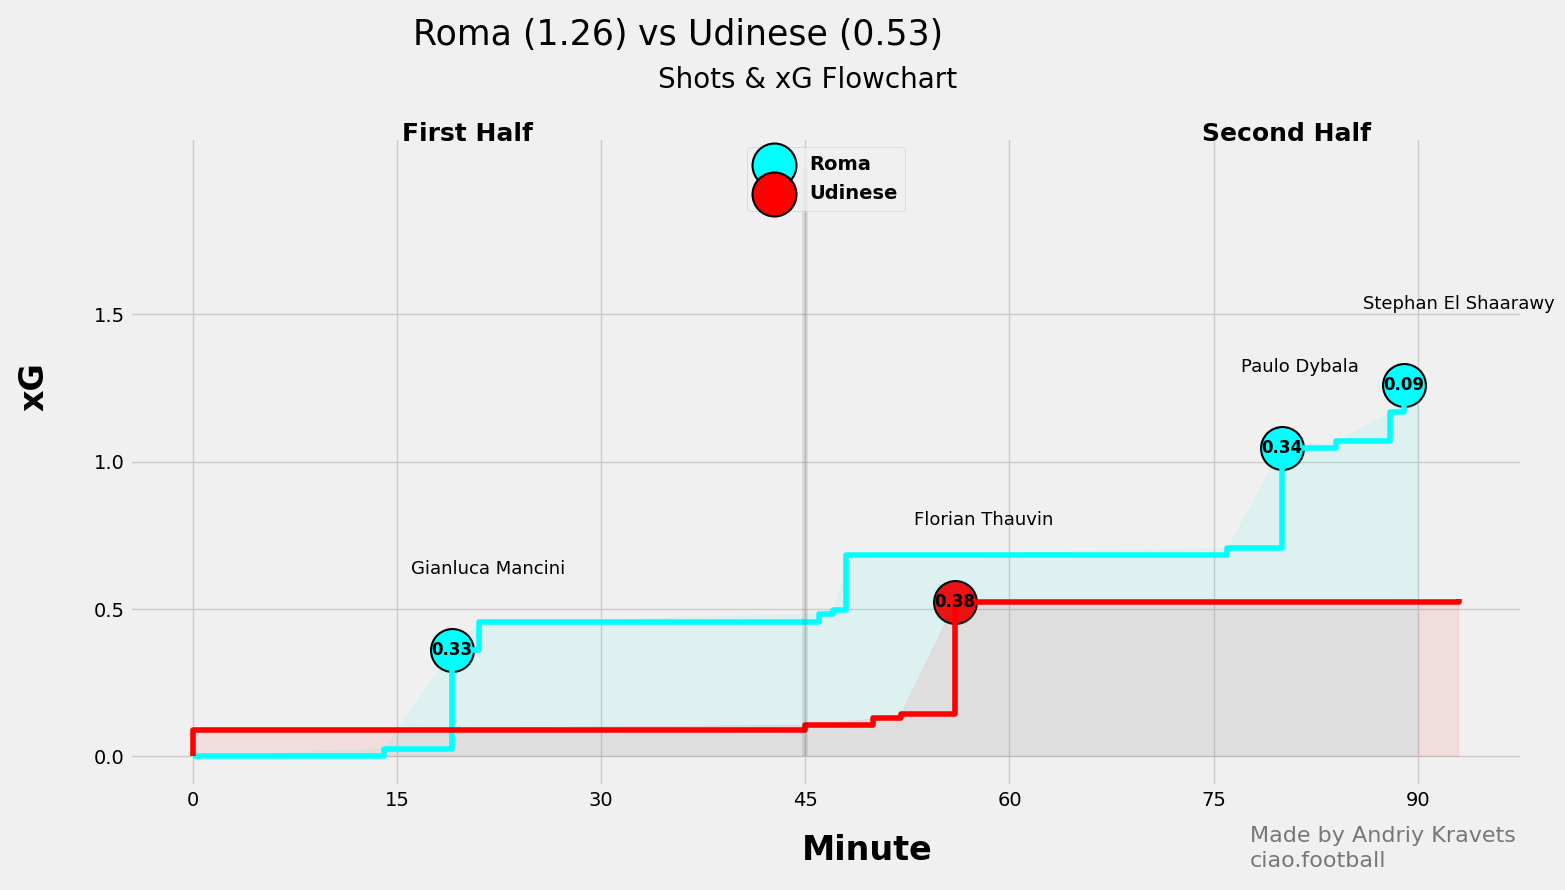

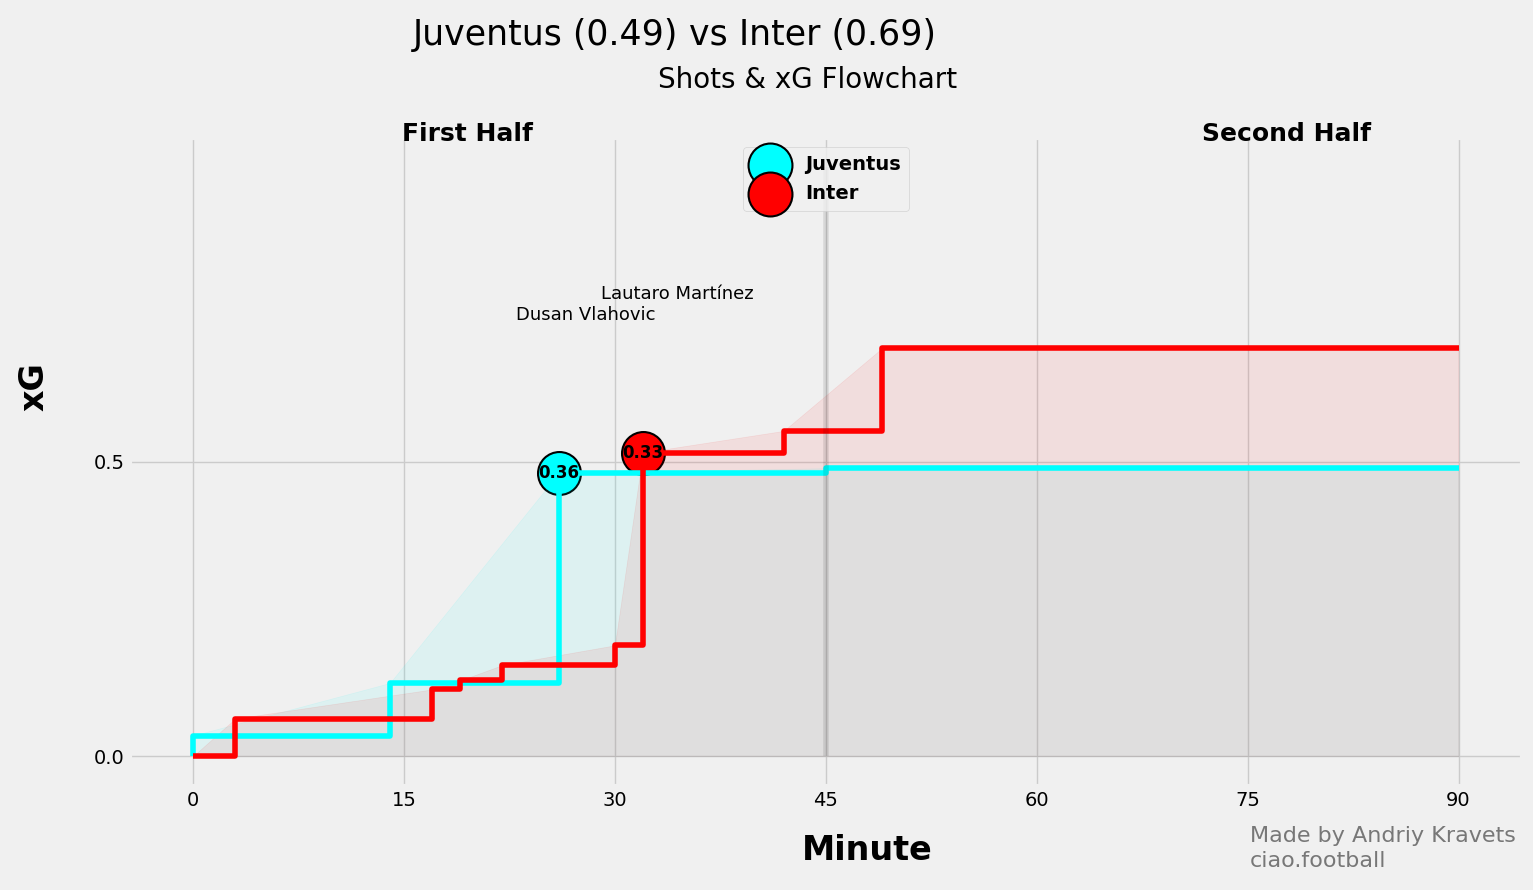

In [56]:
matches_yesterday = data[data['date'] == str(date.today() - timedelta(days=1))]

if len(matches_yesterday) > 0:
    if len(matches_yesterday[matches_yesterday['isResult'] == True]) > 0:
        for match_id in matches_yesterday['id']:
            data_ids = get_match_shots(str(match_id))#GET_DATA FUNC
            text_home, text_away, label_home, label_away, xGcum_away, xGcum_home, team_away, team_home, xGcum_away_int, xGcum_home_int,\
            x, x1, y, y1, y_plot, y1_plot, df_home, df_away = prepare_shots_data_2(data_ids)
            shots_map_viz_2(text_home, text_away, label_home, label_away, xGcum_away, xGcum_home, team_away, team_home, xGcum_away_int, xGcum_home_int,\
            x, x1, y, y1, y_plot, y1_plot, df_home, df_away)
            #h_min, a_min, h_xg, a_xg, data_home, data_away = prepare_shots_data(data_ids)
            #shots_map_viz(h_min, a_min, h_xg, a_xg, data_home, data_away)

In [16]:
#shots_data = []

def get_match_shots(match):
    # Scrape a single match shots
    base_url = 'https://understat.com/match/'
    # Type the match id
    #match = str(input('Please enter the match id: '))
    match = match 
    url = base_url+match
    #Use requests to get the webpage and BeautifulSoup to parse the page
    res = requests.get(url)
    soup = BeautifulSoup(res.content)
    scripts = soup.find_all('script')
    #get only the shotsData
    strings = scripts[1].string
    # Strip unnecessary symbols and get only JSON data 
    str_start = strings.index("('")+2 
    str_end = strings.index("')") 
    json_data = strings[str_start:str_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')
    
    # Convert string to JSON
    shots_data = json.loads(json_data)

    return shots_data

In [32]:
def prepare_shots_data_2(data):
    
    data_all = json_normalize(data, sep = "_")
    data_home = json_normalize(data['h'], sep = "_")
    data_away = json_normalize(data['a'], sep = "_")
    
    # Creating the 2 dfs
    
    df_away = pd.DataFrame(data['a'])
    df_home = pd.DataFrame(data['h'])
    
    # Selecting only the useful columns
    
    df_away = df_away[['minute','player',"a_team",'result','xG','h_a']]
    df_home = df_home[['minute','player',"h_team",'result','xG','h_a']]
    
    # Renaming columns 
    
    df_away.rename(columns={"a_team": "team"})
    df_home.rename(columns={"h_team": "team"})
    
    # Changing data types
    
    df_away = df_away.astype({"xG": float, "minute": float})
    df_home = df_home.astype({"xG": float, "minute": float})

    # creating first zero xG so x ticks start with 0 for home
    zero_min_xg = pd.DataFrame({'minute': float('0.0'), 'player': 'NaN', 'h_team': str(df_home['h_team'].iloc[-1]),
                'result': 'NaN', 'xG': float('0.0'), 'h_a': 'h'}, index=[0])
    
    df_home = pd.concat([zero_min_xg ,df_home.loc[:]]).reset_index(drop=True)
    # adding last min xG with 0, so xG line ends in the end of the x ticks for home
    if df_home['minute'][-1:].values < 90.0:
        last_min_value = 90.0
    else:
        last_min_value = df_home['minute'][-1:].values
    
    last_min_xg_h = pd.DataFrame({'minute': float(last_min_value), 'player': 'NaN', 'h_team': str(df_home['h_team'].iloc[-1]),
                'result': 'NaN', 'xG': float('0.0'), 'h_a': 'h'}, index=[0])
    
    df_home = pd.concat([df_home.loc[:], last_min_xg_h]).reset_index(drop=True)


    # creating first zero xG so x ticks start with 0 for away
    zero_min_xg = pd.DataFrame({'minute': float('0.0'), 'player': 'NaN', 'a_team': str(df_away['a_team'].iloc[-1]),
                'result': 'NaN', 'xG': float('0.0'), 'h_a': 'a'}, index=[0])
    
    df_away = pd.concat([zero_min_xg ,df_away.loc[:]]).reset_index(drop=True)
    # adding last min xG with 0, so xG line ends in the end of the x ticks for home
    if df_away['minute'][-1:].values < 90.0:
        last_min_value = 90.0
    else:
        last_min_value = df_away['minute'][-1:].values
    
    last_min_xg_a = pd.DataFrame({'minute': float(last_min_value), 'player': 'NaN', 'a_team': str(df_away['a_team'].iloc[-1]),
                'result': 'NaN', 'xG': float('0.0'), 'h_a': 'a'}, index=[0])
    
    df_away = pd.concat([df_away.loc[:], last_min_xg_a]).reset_index(drop=True)

    # Creating new column xG cumulative
    df_away['xGcum'] = np.cumsum(df_away['xG'])
    df_home['xGcum'] = np.cumsum(df_home['xG'])

    # creating the dictionaries
    x = df_home[df_home['result']=='Goal']['minute'].tolist()
    x1 = df_away[df_away['result']=='Goal']['minute'].tolist()
    y =df_home[df_home['result']=='Goal']['xGcum'].tolist()
    y1 = df_away[df_away['result']=='Goal']['xGcum'].tolist()
    
    # xG inside the scatterplots
    y_plot =np.round(df_home[df_home['result']=='Goal']['xG'],2).tolist()
    y1_plot = np.round(df_away[df_away['result']=='Goal']['xG'],2).tolist()
    
    # Annotation text
    text_home = df_home[df_home['result']=='Goal']['player'].tolist()
    text_away = df_away[df_away['result']=='Goal']['player'].tolist()
    label_home = df_home['h_team'].unique().tolist()
    label_away = df_away['a_team'].unique().tolist()
    
    # More annotation text
    xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
    xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
    team_away = str(df_away['a_team'].iloc[-1])
    team_home = str(df_home['h_team'].iloc[-1])

    xGcum_away_int = np.round(df_away['xGcum'].iloc[-1],2)
    xGcum_home_int = np.round(df_home['xGcum'].iloc[-1],2)

    return text_home, text_away, label_home, label_away, xGcum_away, xGcum_home, team_away, team_home, xGcum_away_int, xGcum_home_int,\
        x, x1, y, y1, y_plot, y1_plot, df_home, df_away

In [18]:
def prepare_shots_data(data):
    # Separate home and away teams into different DataFrames

    from pandas import json_normalize
    
    data_all = json_normalize(data, sep = "_")
    data_home = json_normalize(data['h'], sep = "_")
    data_away = json_normalize(data['a'], sep = "_")

    #Converting from string to float
    data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
    data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")
    
    #Converting from string to int
    data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
    data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")
    
    #Getting a column with cumulative result
    data_home['cumsum_xg'] = data_home['xG'].cumsum()
    data_away['cumsum_xg'] = data_away['xG'].cumsum()

    # Creating a df with the data we need only
    home_df = data_home[['minute', 'cumsum_xg']]
    away_df = data_away[['minute', 'cumsum_xg']]
    
    # Creating objects for home/away minutes and xG
    # Setting the 1st elements to zero, so the step chart start from zero position in both teams
    h_min = [0]
    a_min = [0]
    h_xg = [0.0]
    a_xg = [0.0]
    
    # Adding to the lists above all the minutes and xG for home team
    for x in range(len(home_df['minute'])):
        h_xg.append(home_df['cumsum_xg'].iloc[x])
        h_min.append(home_df['minute'].iloc[x])
    
    # Adding to the lists above all the minutes and xG for away team
    for x in range(len(away_df['minute'])):
        a_xg.append(away_df['cumsum_xg'].iloc[x])
        a_min.append(away_df['minute'].iloc[x])

    return h_min, a_min, h_xg, a_xg, data_home, data_away

In [55]:
def shots_map_viz_2(text_home, text_away, label_home, label_away, xGcum_away, xGcum_home, team_away, team_home, xGcum_away_int, xGcum_home_int,\
            x, x1, y, y1, y_plot, y1_plot, df_home, df_away):
    # plot style 
    plt.style.use('fivethirtyeight')
    fig,ax = plt.subplots(figsize = (16,8))
    
    # Step plot for Inter and Udinese 
    ax.step(x = df_home['minute'] ,y = df_home['xGcum'] , where = 'post', color = 'cyan' ,linewidth = 4.0)
    ax.step(x = df_away['minute'] ,y = df_away['xGcum'] , where = 'post', color = 'red' ,linewidth = 4.0)
    
    #sns.scatterplot(x=x,y=y,s=430,marker='o',color='yellow')
    ax.scatter(x=x,y=y, color='cyan', edgecolor='black',s=955, label=team_home,linewidths=1.5,)
    ax.scatter(x=x1,y=y1, color='red', edgecolor='black',s=955, label=team_away,linewidths=1.5)
    
    #FILL AREA BETWEEN LINE AND X 
    #plt.fill_between(x, y, alpha=0.08, color='cyan')
    #plt.fill_between(x1, y1, alpha=0.08, color='red')
    plt.fill_between(df_home['minute'], df_home['xGcum'], alpha=0.08, color='cyan')
    plt.fill_between(df_away['minute'], df_away['xGcum'], alpha=0.08, color='red')
    
    # https://stackoverflow.com/questions/63541222/fill-between-two-lines-lacking-common-x-values
    
    # Text annotation for goals
    for i in range(len(x1)):
        plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.26),c='black',size=13)
    for i in range(len(x)):
        plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.26),c='black',size=13)
    
    # legend
    legend = ax.legend(loc="upper center",prop={'weight':'bold'}, labelcolor='black')
    # These legends are for ax.scatter(x=x1,y=y1, color='red', edgecolor='black',s=955, label="AC Milan",linewidths=1.5)
    # First is for the first team, second for the second
    legend.legend_handles[0]._sizes = [1000]
    legend.legend_handles[1]._sizes = [1000]
    
    # title
    fig_text(0.41,0.97, s="Shots & xG Flowchart\n", fontsize = 20, fontweight = "light", c='black')
    fig_text(0.25,1.03,s=" <{} ({})> vs <{} ({}) >".format(team_home, xGcum_home_int, team_away, xGcum_away_int),
                                                 highlight_textprops=[{"color":'blue'},
                                                {'color':"red"}], c='black', fontsize = 25, fontweight="light")
    
    # text
    fig_text(0.5,0.01, s="Minute\n", fontsize = 24, fontweight = "bold", color = "black")
    fig_text(0.01,0.6, s="xG\n", fontsize = 24, fontweight = "bold", color = "black",rotation=90)
    fig_text(0.25,0.9, s="First Half\n", fontsize = 18, fontweight = "bold", color = "black")
    fig_text(0.75,0.9, s="Second Half\n", fontsize = 18, fontweight = "bold", color = "black")
    fig_text(0.78,0.02, s="Made by Andriy Kravets\nciao.football", fontsize = 16, #fontweight = "bold",
             color = "black", alpha = 0.5)

    # finding max xG cumulative, so to set upper boundary for y ticks (max * 1.15)
    h_max_xg = df_home['xGcum'].max()
    a_max_xg = df_away['xGcum'].max()
    if a_max_xg < h_max_xg:
        max_y = h_max_xg*1.15
    else:
        max_y = a_max_xg*1.15
    # Finally a dotted line to separate the HT 
    plt.vlines( ymin=0, ymax=math.ceil(max_y),x=45, color='black', alpha=0.1,linestyle="solid")
    # ticks
  
    plt.xticks([0,15,30,45,60,75,90], color='black')
    #plt.yticks([0,0.5,1.0,1.5,2.0,2.5], color='black')
    plt.yticks(np.arange(0, math.ceil(max_y), 0.5), color='black')
    
    # Annotate quality chances inside the scatterplots
    
    # Home team
    for i in range(len(x)):
        plt.annotate(y_plot[i], (x[i], y[i]),c='black',size=12,ha='center',va='center',fontweight='bold')
    # Away team
    for i in range(len(x1)):
        plt.annotate(y1_plot[i], (x1[i], y1[i]),c='black',size=12,ha='center',va='center',fontweight='bold')

In [20]:
def shots_map_viz(h_min, a_min, h_xg, a_xg, data_home, data_away):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize = (12,7))
    fig.set_facecolor('#3d4849')
    ax.patch.set_facecolor('#3d4849')
    
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    plt.xticks([0,15,30,45,60,75,90], color='white')
    plt.yticks(color='white')
    plt.xlabel('Minute',color='white',fontsize=16)
    plt.ylabel('xG',color='white',fontsize=16)
    
    '''
    #plot the step graphs
    ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
    ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
    '''
    
    # Passing our lists to step object to plot the chart
    ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
    ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option
    
    # Displaying scatter plots when goals were scored for home team
    for i in range(len(data_home['id'])):
        if data_home.iloc[i]['result'] == 'Goal':
            ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='white', s=1000, marker='o', alpha=0.5)
        if data_home.iloc[i]['result'] == 'OwnGoal':
            ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='red', s=1000, marker='o', alpha=0.5)
    
    # Displaying scatter plots when goals were scored for away team
    for i in range(len(data_away['id'])):
        if data_away.iloc[i]['result'] == 'Goal':
            ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='red', s=1000, marker='o', alpha=0.5)
        if data_away.iloc[i]['result'] == 'OwnGoal':
            ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='white', s=1000, marker='o', alpha=0.5)
    
    plt.title(data_home.iloc[0]['h_team'] + ' (white) vs ' + data_home.iloc[0]['a_team'] + ' (red) ' +\
              str(data_home.iloc[0]['h_goals']) + ':' + str(data_away.iloc[0]['a_goals']), color='white', fontsize=18)
    
    #plt.step(h_min, h_xg)
    #plt.step(a_min, a_xg)
    filename = data_home.iloc[0]['h_team'] + data_home.iloc[0]['a_team']
    plt.savefig(filename)